In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [43]:
df = pd.read_csv('base_segundo_encontro.csv', sep=';', encoding='latin-1')
df

,tempo_conversa_min,risadas,pontos_comuns,nivel_timidez,mensagens_antes,iniciativa_conversa,local_encontro,momento_da_vida,segundo_encontro
0,112,16,6,0,45,8,Restaurante,Estressado,Sim
1,102,13,2,10,41,6,Bar,Estável,Sim
2,24,8,2,3,16,9,Café,Estável,Sim
3,116,7,4,0,8,4,Bar,Estressado,Sim
4,81,1,2,5,5,7,Parque,Estável,Não
...,...,...,...,...,...,...,...,...,...
995,129,19,6,0,25,8,Bar,Estável,Sim
996,68,17,5,6,12,3,Restaurante,Estável,Sim
997,137,5,3,7,7,7,Parque,Cansado,Sim
998,123,10,1,10,27,8,Bar,Estressado,Não


In [44]:
df.isnull().sum()

tempo_conversa_min     0
risadas                0
pontos_comuns          0
nivel_timidez          0
mensagens_antes        0
iniciativa_conversa    0
local_encontro         0
momento_da_vida        0
segundo_encontro       0
dtype: int64

In [45]:
df['momento_da_vida'].unique()

array(['Estressado', 'Estável', 'Cansado'], dtype=object)

In [46]:
mapa = {
    'Estressado' :'1',
    'Estável' : '2',
    'Cansado' : '3'
}

df['momento_da_vida'] = df['momento_da_vida'].astype(str)
df['momento_da_vida'] =  df['momento_da_vida'].map(mapa)
df['momento_da_vida'].unique()

array(['1', '2', '3'], dtype=object)

In [47]:
df['local_encontro'].unique()

array(['Restaurante', 'Bar', 'Café', 'Parque'], dtype=object)

In [48]:
mapa = {
    'Restaurante' :'1',
    'Bar' : '2',
    'Café' :'3',
    'Parque' : '4'
}

df['local_encontro'] = df['local_encontro'].astype(str)
df['local_encontro'] =  df['local_encontro'].map(mapa)
df['local_encontro'].unique()

array(['1', '2', '3', '4'], dtype=object)

In [49]:
df['segundo_encontro'].unique()

array(['Sim', 'Não'], dtype=object)

In [50]:
mapa = {
    'Sim' :'1',
    'Não' : '0'
}

df['segundo_encontro'] = df['segundo_encontro'].astype(str)
df['segundo_encontro'] =  df['segundo_encontro'].map(mapa)
df['segundo_encontro'].unique()

array(['1', '0'], dtype=object)

<AxesSubplot:xlabel='segundo_encontro', ylabel='count'>

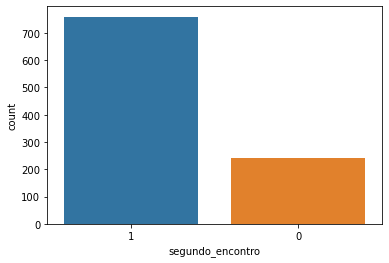

In [51]:
sns.countplot(x = df['segundo_encontro'])

In [52]:
df

,tempo_conversa_min,risadas,pontos_comuns,nivel_timidez,mensagens_antes,iniciativa_conversa,local_encontro,momento_da_vida,segundo_encontro
0,112,16,6,0,45,8,1,1,1
1,102,13,2,10,41,6,2,2,1
2,24,8,2,3,16,9,3,2,1
3,116,7,4,0,8,4,2,1,1
4,81,1,2,5,5,7,4,2,0
...,...,...,...,...,...,...,...,...,...
995,129,19,6,0,25,8,2,2,1
996,68,17,5,6,12,3,1,2,1
997,137,5,3,7,7,7,4,3,1
998,123,10,1,10,27,8,2,1,0


In [53]:
x_df = df.iloc[:, 0:8].values
y_df = df.iloc[:, 8].values

In [54]:
from sklearn.model_selection import train_test_split

x_df_treinamento, x_df_teste, y_df_treinamento, y_df_teste = train_test_split(x_df, y_df, test_size=0.25, random_state = 0)


In [55]:
from sklearn.preprocessing import StandardScaler
scaler_df  = StandardScaler()
x_df = scaler_df.fit_transform(x_df)

In [56]:
x_df_treinamento.shape, y_df_treinamento.shape

((750, 8), (750,))

In [57]:
x_df_teste.shape, y_df_teste.shape

((250, 8), (250,))

In [58]:
from sklearn.svm import SVC

svm_df = SVC(kernel = 'linear', C = 10)
svm_df.fit(x_df_treinamento, y_df_treinamento)

SVC(C=10, kernel='linear')

In [59]:
previsoes = svm_df.predict(x_df_teste)
previsoes

array(['1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0',
       '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1',
       '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1',
       '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0

In [60]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_df_teste, previsoes)

0.928

In [61]:
df

,tempo_conversa_min,risadas,pontos_comuns,nivel_timidez,mensagens_antes,iniciativa_conversa,local_encontro,momento_da_vida,segundo_encontro
0,112,16,6,0,45,8,1,1,1
1,102,13,2,10,41,6,2,2,1
2,24,8,2,3,16,9,3,2,1
3,116,7,4,0,8,4,2,1,1
4,81,1,2,5,5,7,4,2,0
...,...,...,...,...,...,...,...,...,...
995,129,19,6,0,25,8,2,2,1
996,68,17,5,6,12,3,1,2,1
997,137,5,3,7,7,7,4,3,1
998,123,10,1,10,27,8,2,1,0


In [64]:

conversa = input("Qual foi o tempo (minutos) mínimo de conversa: ")
risadas = input("Em uma escala de 0 a 20, qual o nível da risada: ")
comum = input("Quantos pontos em comum tiveram: ")
timidez = input("Em uma escala de 0 a 10, qual o nível de timidez: ")
msg = input("Quantas mensagens trocaram antes do encontro: ")
iniciativa = input("Em uma escala de 0 a 10, iniciativa da conversa: ")
local = input("Qual foi o local de encontro? \n1 - Restaurante\n2 - Bar\n3 - Café\n4 - Parque: ")
momento = input("Que momento estava na vida? \n1 - Estressado\n2 - Estável\n3 - Cansado: ")

resultado = pd.DataFrame([[conversa, risadas, comum, timidez, msg, iniciativa, str(local), str(momento)]], 
                      columns=["tempo_conversa_min", "risadas", "pontos_comuns", "nivel_timidez", 
                               "mensagens_antes", "iniciativa_conversa", "local_encontro", "momento_da_vida"])

resultado_scaled = scaler_df.transform(resultado)


previsao = svm_df.predict(resultado_scaled)

if previsao == ['1']:
    print("\nTerá segundo encontro! :)")
else:
    print("\nProvavelmente não haverá segundo encontro! :(")

Qual foi o tempo (minutos) mínimo de conversa: 120
Em uma escala de 0 a 20, qual o nível da risada: 20
Quantos pontos em comum tiveram: 10
Em uma escala de 0 a 10, qual o nível de timidez: 0
Quantas mensagens trocaram antes do encontro: 50
Em uma escala de 0 a 10, iniciativa da conversa: 10
Qual foi o local de encontro? 
1 - Restaurante
2 - Bar
3 - Café
4 - Parque: 1
Que momento estava na vida? 
1 - Estressado
2 - Estável
3 - Cansado: 1
Teste ['0']

Terá segundo encontro! :)


C:\Users\disrct\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
